In [1]:
!pip install spotipy

You should consider upgrading via the 'c:\users\user\anaconda2\envs\py36\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ast import literal_eval
import math
import csv

In [3]:
data=pd.read_csv("data/data.csv")
data.artists = data.artists.apply(lambda x: literal_eval(x))
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"[DripReport, Tyga]",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"[Leon Bridges, Terrace Martin]",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"[Kygo, Oh Wonder]",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"[Cash Cash, Andy Grammer]",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:
data_artist=pd.read_csv("data/data_by_artist.csv")
# data_artist

data_genre=pd.read_csv("data/data_by_genres.csv")
# data_genre

data_year=pd.read_csv("data/data_by_year.csv")
# data_year

data_withgenre=pd.read_csv("data/data_w_genres.csv")
# data_withgenre

In [4]:
def FitScaler(df):
    scalar=preprocessing.MinMaxScaler().fit(df.values)
    return scalar

def TransformDF(df, Scalar):
    return pd.DataFrame(Scalar.transform(df.values))

In [5]:
songs=data['name']
songs.head(20)

0                           Singende Bataillone 1. Teil
1              Fantasiestücke, Op. 111: Più tosto lento
2                        Chapter 1.18 - Zamek kaniowski
3         Bebamos Juntos - Instrumental (Remasterizado)
4           Polonaise-Fantaisie in A-Flat Major, Op. 61
5                           Scherzo a capriccio: Presto
6        Valse oubliée No. 1 in F-Sharp Major, S. 215/1
7                                   Per aspera ad astra
8                      Moneda Corriente - Remasterizado
9                         Chapter 1.3 - Zamek kaniowski
10    Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....
11       Piano Sonata No. 2, Op. 35: IV. Finale. Presto
12    Piano Sonata in E-Flat Minor, Op. 26: III. Ada...
13                      Nachtstücke, Op. 23: No. 4 in F
14        Symphony No. 5 in C Minor, Op. 67: 3. Allegro
15              A Shropshire Lad: Is My Team Ploughing?
16    Sonata No. 3, Op. 23 in F-Sharp Minor: IV. Pre...
17                  Invocación al Tango - Remast

In [6]:
numerical_features=['acousticness', 'danceability','energy', 'duration_ms', 'instrumentalness',
 'valence', 'popularity', 'tempo', 'liveness', 'loudness' , 'speechiness', 'year', 'key', 'mode']
num_features = len(numerical_features)
data_numf=data[numerical_features]

In [7]:
numf_columns=data_numf.columns
scalar=FitScaler(data_numf)
data_numf=TransformDF(data_numf, scalar)
data_numf.columns=numerical_features
data_numf

,acousticness,danceability,energy,duration_ms,instrumentalness,valence,popularity,tempo,liveness,loudness,speechiness,year,key,mode
0,0.998996,0.716599,0.1950,0.028442,0.563000,0.7790,0.00,0.485348,0.1510,0.745000,0.052219,0.070707,0.909091,1.0
1,0.997992,0.383603,0.0135,0.051316,0.901000,0.0767,0.00,0.344019,0.0763,0.494026,0.047678,0.070707,0.727273,1.0
2,0.606426,0.758097,0.2200,0.018374,0.000000,0.8800,0.00,0.439086,0.1190,0.627609,0.958720,0.070707,0.454545,0.0
3,0.998996,0.790486,0.1300,0.032538,0.887000,0.7200,0.00,0.442470,0.1110,0.708887,0.095562,0.070707,0.090909,0.0
4,0.993976,0.212551,0.2040,0.126450,0.908000,0.0693,0.01,0.254614,0.0980,0.676079,0.043756,0.070707,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.173695,0.885628,0.4430,0.029396,0.000032,0.3060,0.75,0.409732,0.0891,0.822786,0.147575,1.000000,0.090909,1.0
169905,0.016767,0.727733,0.3850,0.030076,0.031300,0.2700,0.64,0.524395,0.1110,0.768820,0.041589,1.000000,0.727273,1.0
169906,0.540161,0.520243,0.5390,0.032527,0.002330,0.1530,0.70,0.506778,0.1080,0.793485,0.108359,1.000000,0.636364,1.0
169907,0.071687,0.653846,0.7610,0.030046,0.000000,0.4720,0.70,0.532244,0.2220,0.899585,0.039732,1.000000,0.090909,1.0


In [8]:
mostpopular=np.argsort(data['popularity'])[::-1][:10]
for element in mostpopular:
    print (data['name'][element], data['popularity'][element])

Blinding Lights 100
ROCKSTAR (feat. Roddy Ricch) 99
death bed (coffee for your head) (feat. beabadoobee) 97
THE SCOTTS 96
Toosie Slide 95
ily (i love you baby) (feat. Emilee) 95
Supalonely 95
The Box 95
GOOBA 94
Party Girl 94


In [9]:
# mapping from input song/artist to the feature set
# add handling for typos or songs not in dataset!
def song_to_features(song_name, artists_name, features):
    not_exact = 0
    songs = data[(data.name.str.lower() == song_name.lower())]
    for index,row in songs.iterrows():
        artists_list = [x.lower() for x in row.artists]
        artists_input = [x.lower() for x in artists_name]
        if (set(artists_list) == set(artists_input)):
            print('\nInput: exact artist match found.')
            return features.loc[index].copy()
        elif (all(x in artists_list for x in artists_input)):
            not_exact = features.loc[index].copy()
    if type(not_exact) != int:
        print('\nInput: partial artist match found.')
    return not_exact

In [10]:
from sklearn.cluster import KMeans

# k-means clustering (n_clusters=8 is default)
km = KMeans()
km.fit(data_numf)
clustering = km.predict(data_numf)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats import pearsonr
from scipy.stats import spearmanr


# inefficient implementations of pearson/spearman
def pearson(a,b):
    pear=lambda row: pearsonr(a.flatten(),row)[0]
    temp= np.apply_along_axis(pear,1,b)
    return temp

def spearman(a,b):
    spear=lambda row: spearmanr(a.flatten(),row)[0]
    temp= np.apply_along_axis(spear,1,b)
    return temp

# content-based recommendation using similarity
def recommendation(song_feat, data_feat, k):
    x=song_feat.to_numpy().reshape(1, -1)
    scaler = MinMaxScaler()

    # Inner Product
    matrix_inner = np.inner(x,data_feat.to_numpy())
    scaler.fit(matrix_inner.reshape(-1, 1))
    matrix_inner = scaler.transform(matrix_inner.reshape(-1, 1)).flatten()

    # Cosine Similarity
    matrix_cossim = cosine_similarity(x,data_feat.to_numpy())
    scaler.fit(matrix_cossim.reshape(-1, 1))
    matrix_cossim = scaler.transform(matrix_cossim.reshape(-1, 1)).flatten()

    # Euclidean Distance
    matrix_euclid = euclidean_distances(x,data_feat.to_numpy())
    scaler.fit(matrix_euclid.reshape(-1, 1))
    matrix_euclid = 1.0-scaler.transform(matrix_euclid.reshape(-1, 1)).flatten()

    # Manhattan Distance
    matrix_manhatt = manhattan_distances(x,data_feat.to_numpy())
    scaler.fit(matrix_manhatt.reshape(-1, 1))
    matrix_manhatt = 1.0-scaler.transform(matrix_manhatt.reshape(-1, 1)).flatten()
    
    # Pearson Correlation
    # matrix_pearson = pearson(x,data_feat.to_numpy())
    # scaler.fit(matrix_pearson.reshape(-1, 1))
    # matrix_pearson = scaler.transform(matrix_pearson.reshape(-1, 1)).flatten()

    # Spearman Correlation
    # matrix_spearman = spearman(x,data_feat.to_numpy())
    # scaler.fit(matrix_spearman.reshape(-1, 1))
    # matrix_spearman = scaler.transform(matrix_spearman.reshape(-1, 1)).flatten()

    # Combining Metrics
    # matrix = (matrix_inner + matrix_cossim + matrix_euclid + matrix_manhatt + matrix_pearson + matrix_spearman) / 6.0
    matrix = (matrix_inner*0.1 + matrix_cossim*0.5 + matrix_euclid*0.3 + matrix_manhatt*0.1)

    # deduping song itself
    top_cossim_idx = np.argmax(matrix_cossim)
    top_cossim_score = matrix_cossim[top_cossim_idx]

    # ranking recommendations
    top_all_idx = np.argmax(matrix)
    if (round(top_cossim_score,7) == 1.0) and (top_all_idx == top_cossim_idx):
        ranking = np.argsort(matrix)[::-1][1:k+1]
        scores = matrix[ranking]
    else:
        ranking = np.argsort(matrix)[::-1][:k]
        scores = matrix[ranking]

    # formatting output
    output = []
    for i in range(k):
        output.append((ranking[i], data.name[ranking[i]], data.artists[ranking[i]], round(scores[i],4)))
        # output.append((ranking[i], 'spotify:track:'+ str(data.id[ranking[i]]), data.artists[ranking[i]], round(scores[i],4)))
    return output

### Recommendation for Songs in initial Dataset

In [12]:
# INPUT CONFIGURATION
n = 5
input_name = 'baby'
input_artists = ['justin bieber']
input_weights = {'acousticness': 10, 
                'energy': 10, 
                'popularity': 10} #scale from 1-10

# get features for input
input_rec = song_to_features(input_name, input_artists, data_numf)


Input: partial artist match found.


In [13]:
# CLUSTERING TO IMPROVE PERFORMANCE
# zero out samples not in clusters of input
input_pred = km.predict(input_rec.to_numpy().reshape(1, -1))
input_data = data_numf.copy()
input_data[clustering!=input_pred] *= 0


# CUSTOM FEATURE WEIGHTS

# interpretation 1: users choose which columns are more important for them
# (e.g. "I want recs that, most importantly, have the same acousticness as my input song/playlist")
# https://stats.stackexchange.com/questions/384419/weighted-cosine-similarity
# for f,w in input_weights.items():
#         if f in numerical_features:
#                 input_rec[f] *= (1+w/10.0)
#                 input_data[f] *= (1+w/10.0)

# interpretation 2: users choose which columns they want to change from input
# (e.g. "I want recs that resemble my input BUT an acoustic version with much higher acousticness value")
for f,w in input_weights.items():
        if f in numerical_features:
                input_rec[f] = w/10.0

In [ ]:
# OUTPUT RECOMMENDATION
print('Input Song: ' + input_name)
print('Input Artists: ' + str(input_artists))
print('Input Weights: ' + str(input_weights))
if type(input_rec) == int:
        print('\nFailure: Invalid Input')
else:
        output_rec = recommendation(input_rec, input_data, n)
        print('\nRecommendations: ')
        for i in range(n):
                idx,name,artists,score = output_rec[i]
                print(str(i+1) + '. ' + name)
                print('   by ' + str(artists))
                print('   Similarity score: ' + str(score))

### Recommendations for any song using Spotify API

In [15]:
supported_search=['album', 'artist', 'playlist', 'track', 'show', 'episode']

In [16]:
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

# searchfor= 'artist'
# searchtrack='Queen'

searchfor= 'track'
searchtrack=['Bohemian Rhapsody']
# searchtrack= ['Bohemian Rhaps','We Will you', 'Shape of You','Rockstar', 'Test Song']
searchartist= ['Queen','Ed Sheeran', 'Post Malone featuring 21 Savage']
# searchartist= []


runningdict={}
def spotifytodf(dataset, searchtrack, searchartist=[], searchfor='track'):
    columns=list(dataset.columns)
    searchdf=pd.DataFrame()
    searchtrack=list(set(searchtrack))

    playlist=[]
    spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials('67ea80ebecf24f339e67d0b39eaee801','025f72eeeae5491e98aa9d960dd3422b'))

    for track in searchtrack: 
        results = spotify.search(q=searchfor + ":" + track, type=searchfor)
        # print (results[searchfor + "s"])
        items = results[searchfor + "s"]['items']
        if len(items) > 0:
            search = items[0]
            for i in range(0, len(items)):
                # print (items[i]['artists'][0]['name'])
                if items[i]['name']==track and items[i]['artists'][0]['name'] in searchartist:
                    search=items[i]   

            playlist.append(search['name'])

            
            featurelibrary=spotify.audio_features(search['id'])[0]
            
            searchdict={}
            for col in columns:
                if col in featurelibrary.keys():
                    searchdict[col]=[featurelibrary[col]]
                if col == 'year':
                    searchdict['year']= search['album']['release_date'][0:4]
                if col in search:
                    value=search[col]
                    if value is True:
                        searchdict[col]=[1]
                    elif value is False:
                        searchdict[col]=[0]
                    else:
                        searchdict[col]=[value]
                    
            # print (searchdict)
            searchresult=pd.DataFrame.from_dict(searchdict)
            searchdf=searchdf.append(searchresult, ignore_index=True)
        else:
            print ("Not Found: " + str(track))
    # print (searchdf)
        print ("Artist: " + str(search['artists'][0]['name']))
    return (searchdf,playlist)

In [19]:
import operator
def getrecscombine(dataset,row, k, artists=[]):
    # print ("Playlist " + str(q) + ": " + str(df_dict[q]))
    # print ('\n')
    # print (row)
    temp=spotifytodf(dataset,row, searchartist=artists)
    if len(temp[1]) ==0:
        mostpop=np.argsort(data['popularity'])[::-1][:k]
        recs=list(data['name'].loc[mostpop])
        # recs= [str(i) for i in recs]
        weights= [(1/k)/(k)] * k
        return recs #, weights
    playlist=temp[1]
    
    
    temp= TransformDF(temp[0], scalar)
    temp.columns=numerical_features
    counts={}
    for i in range(min(10,len(temp))):
        output_rec = recommendation(temp.loc[i], dataset, k)
    
        for song in output_rec:
            if song[1] not in counts.keys():
                counts[song[1]]=song[3]
            else:
                counts[song[1]]=counts[song[1]]+song[3]

    playlist= list(set(playlist))
    print ("Input Song: " + str(playlist))
    for usersong in playlist:
        if usersong in counts.keys():
            del counts[usersong]
    sorted_count = dict(sorted(counts.items(), key=operator.itemgetter(1),reverse=True))
    # print ("Song Recommendations: " +  str(list(sorted_count.keys())[:k]))
    # print ("Song Recommendations val: " +  str(list([val/len(temp) for val in sorted_count.values()])[:k]))
    return list(sorted_count.keys())[:k],list([val/len(temp) for val in sorted_count.values()])[:k]

In [20]:
k=5
output_rec=getrecscombine(input_data, ['Willow','Therefore I Am'],k, ['Taylor Swift', 'Billie Eilish'])
# output_rec=getrecscombine(input_data, ['Willow'],k, ['Taylor Swift'])
print('\nRecommendations: ') 
name,score = output_rec
for i in range(k):
    print(str(i+1) + '. ' + str(name[i]))
    print('   Similarity score: ' + str(score[i]))

Artist: Taylor Swift
Artist: Billie Eilish
Input Song: ['willow', 'Therefore I Am']

Recommendations: 
1. None Of Your Concern (feat. Big Sean)
   Similarity score: 0.49055
2. None Of Your Concern
   Similarity score: 0.48815
3. Everybody Dies In Their Nightmares
   Similarity score: 0.4863
4. Comfortable
   Similarity score: 0.4859
5. Mirror
   Similarity score: 0.48585


### Feature Analysis

In [21]:
analyzed_features=['acousticness', 'danceability','energy', 'duration_ms', 'instrumentalness', 'explicit', 
 'valence', 'popularity', 'tempo', 'liveness', 'loudness' , 'speechiness', 'year', 'mode', 'key']

data_anaf = data[analyzed_features]
scalar=FitScaler(data_anaf)
data_anaf=TransformDF(data_anaf, scalar)
data_anaf.columns=analyzed_features

In [22]:
def visualizedata(df, column1, column2=None, column3= None):
    if (column2 == None) and (column3==None):
        plt.figure(figsize=(10,10))
        plt.hist(df[column1], bins=(len(df[column1])//1000))
        plt.xlabel(column1)
        plt.ylabel("Count")
        plt.title("Histogram of " + column1)
        plt.show()
    elif ((column3==None) and (column2 != None)) or ((column2==None) and (column3 != None)):
        plt.figure(figsize=(10,10))
        plt.plot(df[column1], df[column2], '.')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(column1 + ' vs ' + column2)
        plt.show()
    else:
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection="3d")
        ax.plot(df[column1], df[column2], df[column3], '.')
        ax.set_xlabel(column1)
        ax.set_ylabel(column2)
        ax.set_zlabel(column3)
        ax.set_title(column1 + ' vs ' + column2 + ' vs ' + column3)
        plt.show()

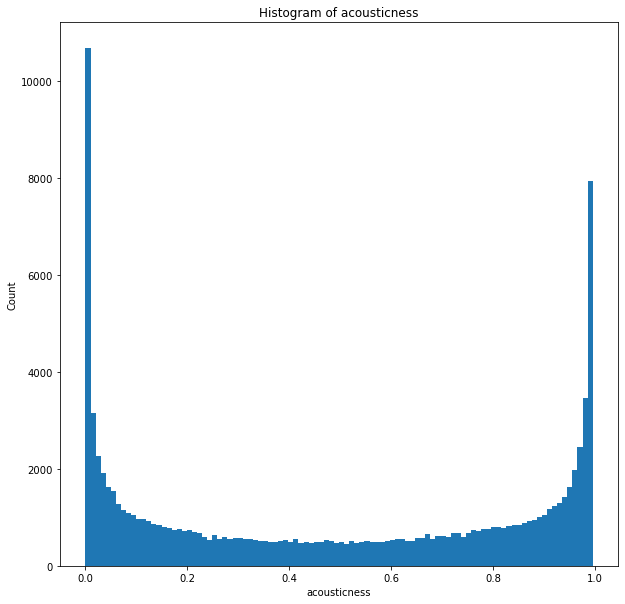

In [23]:
# visualizedata(data[0:10000], 'energy', 'danceability', 'acousticness')
# visualizedata(data[0:10000], 'energy', 'danceability')
visualizedata(data[0:100000], 'acousticness')

In [24]:
def plotsublots(df ,columnlist):
    x=4
    y=4
    fig, ax = plt.subplots(x,y,figsize=(8,8))
    
    fig.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=1, top=1, wspace=.5, hspace=.5)
    for i, element in enumerate(columnlist):
        b=i//x
        a=i%x
        ax[a][b].hist(df[element])
        ax[a][b].set_title(element)

RAW:


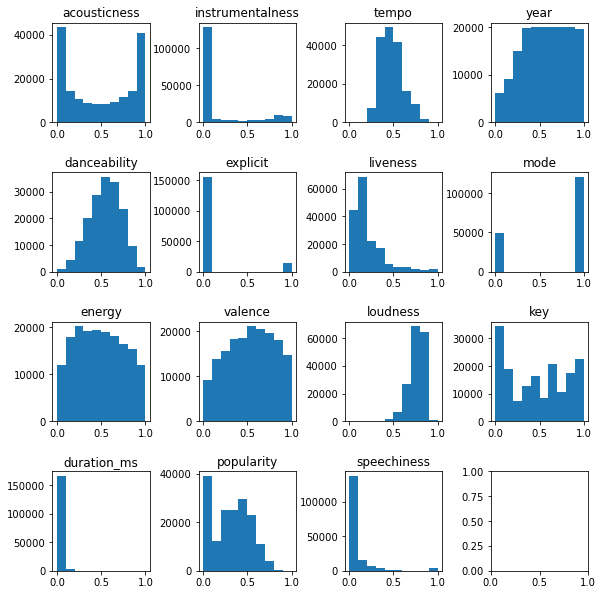

In [25]:
print('RAW:')
plotsublots(data_anaf, analyzed_features)

NORMALIZED:


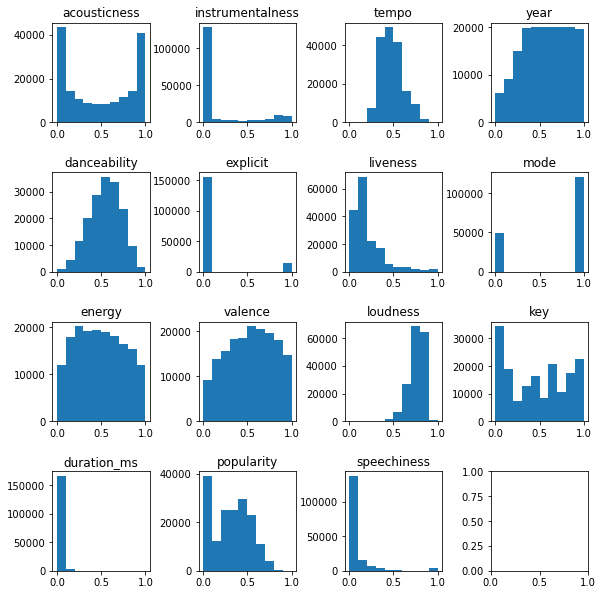

In [26]:
print('NORMALIZED:')
plotsublots(data_anaf, analyzed_features)

In [27]:
for feature in numerical_features:
    f_max = data_anaf[feature].max()
    f_min = data_anaf[feature].min()
    f_mean = data_anaf[feature].mean()
    f_median = data_anaf[feature].median()
    f_std = data_anaf[feature].std()
    f_cv = f_std/f_mean
    f_sem = data_anaf[feature].sem()

    print('for ' + feature + ':\n--------------------')
    print('max: ' + str(f_max))
    print('min: ' + str(f_min))
    print('mean: ' + str(f_mean))
    print('median: ' + str(f_median))
    print('standard deviation: ' + str(f_std))
    print('coefficient of variation: ' + str(f_cv))
    print('standard error of the mean: ' + str(f_sem) + '\n')

for acousticness:
--------------------
max: 1.0
min: 0.0
mean: 0.4951947551705625
median: 0.493975903614458
standard deviation: 0.37813962082112157
coefficient of variation: 0.7636179843845013
standard error of the mean: 0.0009173688568115411

for danceability:
--------------------
max: 1.0
min: 0.0
mean: 0.5446859485845656
median: 0.554655870445344
standard deviation: 0.17747548790243503
coefficient of variation: 0.32583085420805735
standard error of the mean: 0.00043055653648667666

for energy:
--------------------
max: 1.0
min: 0.0
mean: 0.4885931303603691
median: 0.48100000000000004
standard deviation: 0.26738993295713526
coefficient of variation: 0.5472650275699085
standard error of the mean: 0.0006486894882560808

for duration_ms:
--------------------
max: 1.0000000000000002
min: 0.0
mean: 0.041919549186745786
median: 0.03769492841572083
standard deviation: 0.022473714991316715
coefficient of variation: 0.5361153787985512
standard error of the mean: 5.4521359557943026e-05

for in